In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Q1) Prepare a classification model using SVM for salary data

In [3]:
test_data = pd.read_csv(r"C:\Users\shrut\Downloads\SalaryData_Test(1).csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train_data = pd.read_csv(r"C:\Users\shrut\Downloads\SalaryData_Train(1).csv")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA
# a) For Test data

In [5]:
test_data.shape

(15060, 14)

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [9]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
test_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

# b) For Train data

In [11]:
train_data.shape

(30161, 14)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [16]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

# Data Visualization

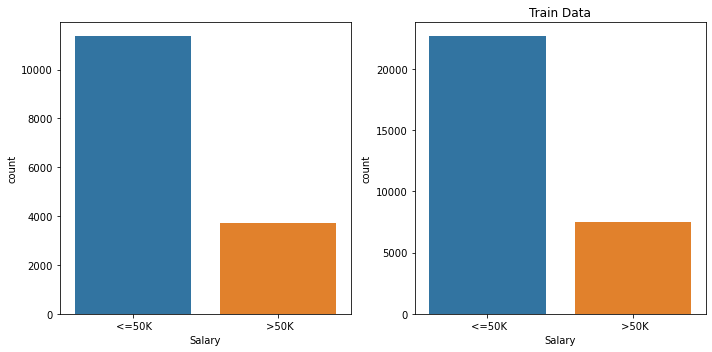

In [20]:
# Visualization using Countplot
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(test_data.Salary, ax = ax[0])
sns.countplot(train_data.Salary, ax = ax[1])
plt.title('Train Data')
plt.tight_layout()
plt.show()

# Lable Encoder
# a) For Train data

In [21]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


# b) For Test data

In [22]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


# Correlation Matrix
# a) For Train data

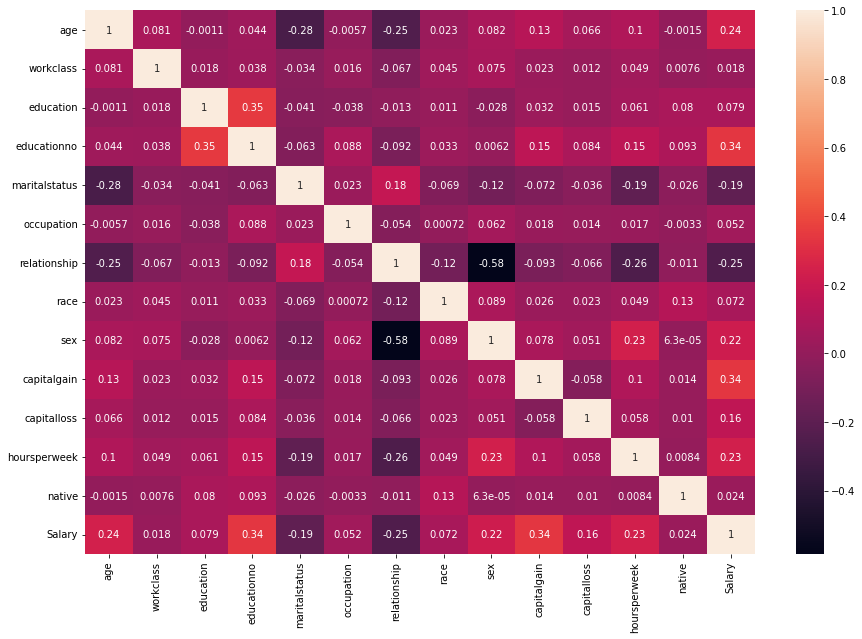

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

# b) For Test data

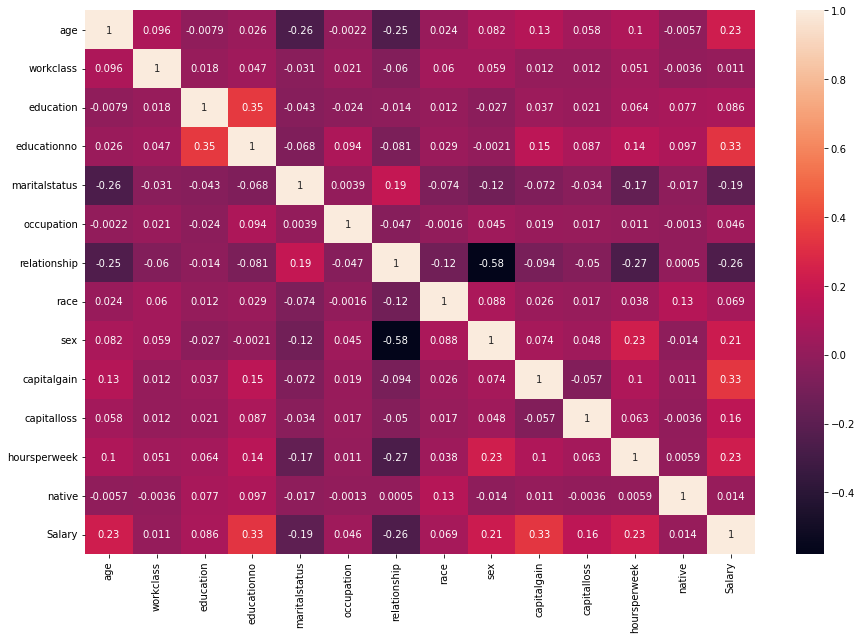

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(test_data.corr(),annot = True)
plt.show()

# Extrating the independent and dependent variables
# a) For Train data

In [25]:
X_train = train_data.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis = 1)
X_train.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,0,24,0,39,0
1,33,12,3,0,0,12,0
2,21,8,5,0,0,39,0
3,36,6,5,0,0,39,0
4,11,12,9,0,0,39,0


In [26]:
Y_train = train_data["Salary"]
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [27]:
X_train.shape, Y_train.shape

((30161, 7), (30161,))

# b) For Test data

In [28]:
X_test = test_data.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis = 1)
X_test.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,6,0,0,39,0
1,21,8,4,0,0,49,0
2,11,11,10,0,0,39,1
3,27,9,6,87,0,39,1
4,17,5,7,0,0,29,0


In [29]:
Y_test = test_data["Salary"]
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [30]:
X_test.shape, Y_test.shape

((15060, 7), (15060,))

# SVM with Kernel rbf

In [31]:
clf = SVC()

clf = SVC(kernel = 'rbf')
clf.fit(X_train , Y_train)

y_pred = clf.predict(X_test)

In [32]:
acc = accuracy_score(Y_test, y_pred) * 100
print('Accuracy For Kernal rbf is', acc)

Accuracy For Kernal rbf is 98.56573705179282


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11360
           1       0.98      0.96      0.97      3700

    accuracy                           0.99     15060
   macro avg       0.98      0.98      0.98     15060
weighted avg       0.99      0.99      0.99     15060



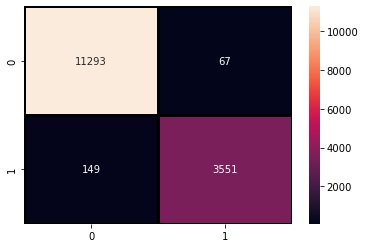

In [34]:
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(Y_test,y_pred))

# Linear Support Vector Machine

In [38]:
svc = SVC(gamma = 0.22)
svc.fit(X_train, Y_train)
y_pred1=svc.predict(X_test)

score_svc = svc.score(X_test, Y_test)
print('The accuracy of Linear SVC is', score_svc)

The accuracy of Linear SVC is 0.9072377158034528


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11360
           1       0.96      0.65      0.77      3700

    accuracy                           0.91     15060
   macro avg       0.93      0.82      0.86     15060
weighted avg       0.91      0.91      0.90     15060



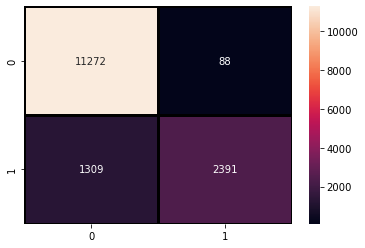

In [39]:
sns.heatmap(confusion_matrix(Y_test, y_pred1),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(Y_test,y_pred1))

# SVM with Kernel poly

In [40]:
clf = SVC(kernel = 'poly',C = 10, gamma = 0.1)
clf.fit(X_train , Y_train)
y_pred2 = clf.predict(X_test)

acc = accuracy_score(Y_test, y_pred2) * 100
print('Accuracy For Kernal Poly :', acc)

Accuracy For Kernal Poly : 99.99335989375831


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



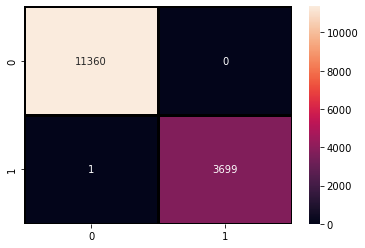

In [41]:
sns.heatmap(confusion_matrix(Y_test, y_pred2),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(Y_test,y_pred2))

# SVM with Kernel sigmoid

In [42]:
clf = SVC(kernel = 'sigmoid',C = 10, gamma = 0.1)
clf.fit(X_train , Y_train)

y_pred3 = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred3) * 100
print('Accuracy For Kernal Sigmoid :', acc)

Accuracy For Kernal Sigmoid : 75.41832669322709


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



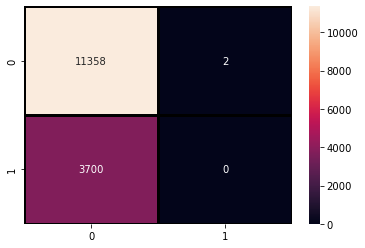

In [44]:
sns.heatmap(confusion_matrix(Y_test, y_pred3),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(Y_test,y_pred3))

# Conclusion :
Here we applied SVM to the data using SVM with Kernal rbf, Linear SVM, SVM with Kernel poly, SVM with Kernel sigmoid and obtained accuracies for each model.

* The accuracy of model for Kernal rbf     : 98.56%
* The accuracy of model for Linear SVM     : 90.72%
* The accuracy of model for Kernal Poly    : 99.99%
* The accuracy of model for Kernal Sigmoid : 75.41%

Hence, we can say that SVM with Kernel Poly have the best model accuracy with 99.99%

# Q2) classify the Size_Categorie using SVM

In [45]:
forest_data = pd.read_csv(r"C:\Users\shrut\Downloads\forestfires (2).csv")
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [46]:
forest_data.shape

(517, 31)

In [47]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [48]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [49]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [51]:
forest_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [52]:
forest_data_1 = forest_data.drop(['month','day'],axis = 1)
forest_data_1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


# Correlation Matrix

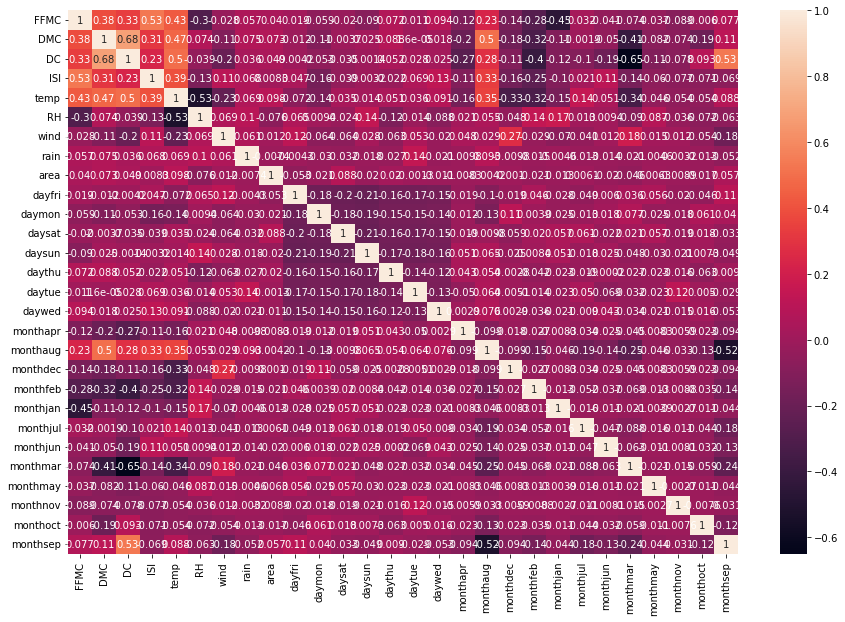

In [53]:
plt.figure(figsize = (15,10))
sns.heatmap(forest_data_1.corr(),annot = True)
plt.show()

# Data Visualization

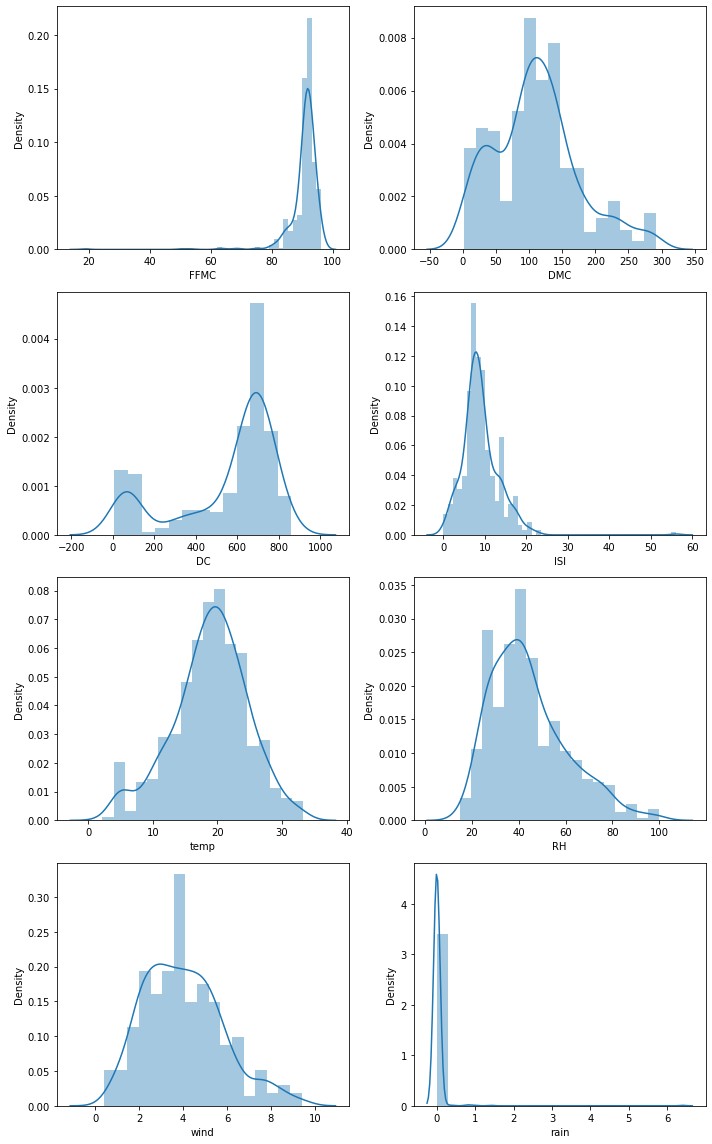

In [54]:
# Visualization using Distplot
fig, ax = plt.subplots(4,2, figsize = (10,16))

sns.distplot(forest_data_1.FFMC, ax = ax[0,0])
sns.distplot(forest_data_1.DMC, ax = ax[0,1])
sns.distplot(forest_data_1.DC, ax = ax[1,0])
sns.distplot(forest_data_1.ISI, ax = ax[1,1])
sns.distplot(forest_data_1.temp, ax = ax[2,0])
sns.distplot(forest_data_1.RH, ax = ax[2,1])
sns.distplot(forest_data_1.wind, ax = ax[3,0])
sns.distplot(forest_data_1.rain, ax = ax[3,1])

plt.tight_layout()
plt.show()

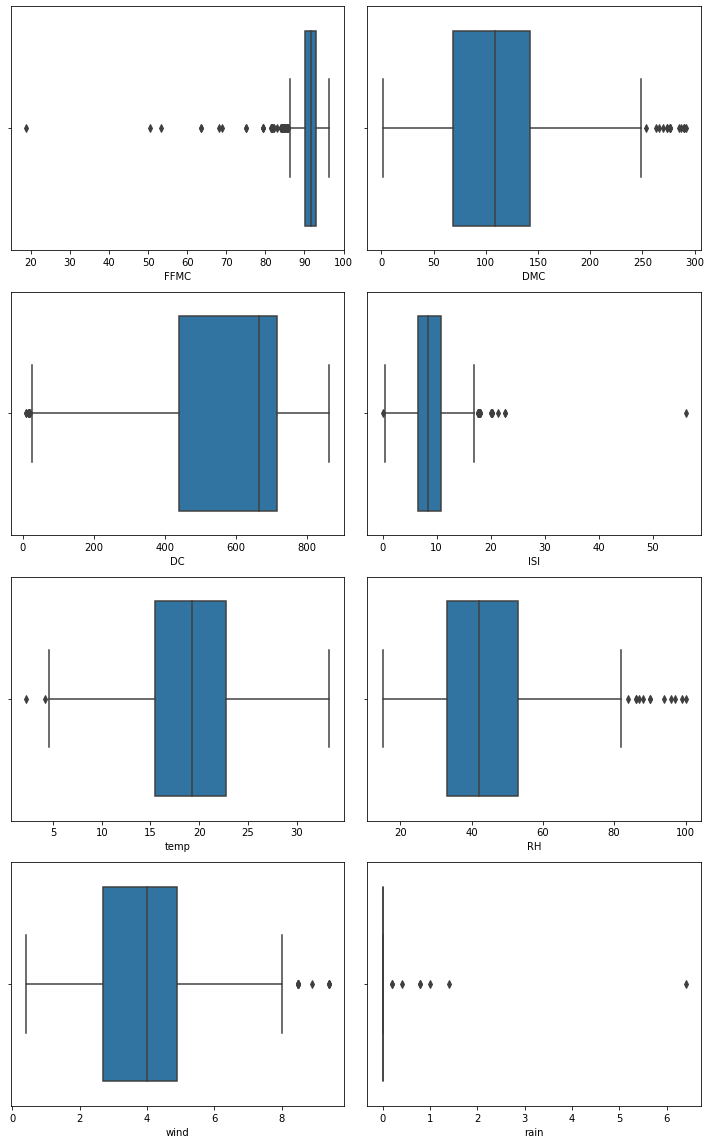

In [55]:
# Checking of the outlier
fig, ax = plt.subplots(4,2, figsize = (10,16))

sns.boxplot(forest_data_1.FFMC, ax = ax[0,0])
sns.boxplot(forest_data_1.DMC, ax = ax[0,1])
sns.boxplot(forest_data_1.DC, ax = ax[1,0])
sns.boxplot(forest_data_1.ISI, ax = ax[1,1])
sns.boxplot(forest_data_1.temp, ax = ax[2,0])
sns.boxplot(forest_data_1.RH, ax = ax[2,1])
sns.boxplot(forest_data_1.wind, ax = ax[3,0])
sns.boxplot(forest_data_1.rain, ax = ax[3,1])

plt.tight_layout()
plt.show()

# Extrating the independent and dependent variables

In [56]:
x = forest_data_1.iloc[:,0:28]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = forest_data_1['size_category']
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

# Train and Test split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

# Appling Grid search for best 'C' or 'Gamma' value

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
clf = SVC()

In [62]:
param_grid = [{'kernel':['rbf'],'gamma':[10,0.5,0.1],'C':[10,0.1,0.001] }]

gsv = GridSearchCV(clf,param_grid,cv = 10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001], 'gamma': [10, 0.5, 0.1],
                          'kernel': ['rbf']}])

In [63]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7535285285285285)

# SVM with Kernel rbf

In [64]:
clf = SVC(kernel = 'rbf',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

In [65]:
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy For Kernal rbf :', acc)

Accuracy For Kernal rbf : 72.43589743589743


              precision    recall  f1-score   support

       large       0.00      0.00      0.00        43
       small       0.72      1.00      0.84       113

    accuracy                           0.72       156
   macro avg       0.36      0.50      0.42       156
weighted avg       0.52      0.72      0.61       156



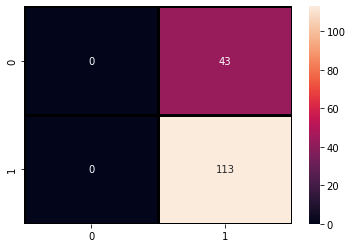

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,y_pred))

# Linear Support Vector Machine

In [69]:
clf = SVC(kernel = 'linear',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred1 = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred1) * 100
print('Accuracy For Kernal Linear :', acc)

Accuracy For Kernal Linear : 98.71794871794873


              precision    recall  f1-score   support

       large       1.00      0.95      0.98        43
       small       0.98      1.00      0.99       113

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



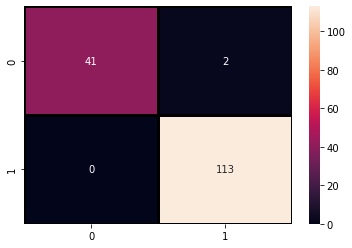

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred1),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,y_pred1))

# SVM with Kernel poly

In [71]:
clf = SVC(kernel = 'poly',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred2 = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred2) * 100
print('Accuracy For Kernal Poly :', acc)

Accuracy For Kernal Poly : 97.43589743589743


              precision    recall  f1-score   support

       large       0.95      0.95      0.95        43
       small       0.98      0.98      0.98       113

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



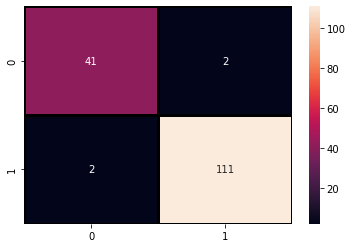

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred2),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,y_pred2))

# SVM with Kernel sigmoid

In [74]:
clf = SVC(kernel = 'sigmoid',C = 10, gamma = 0.1)
clf.fit(x_train , y_train)

y_pred3 = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred3) * 100
print('Accuracy For Kernal Sigmoid :', acc)

Accuracy For Kernal Sigmoid : 72.43589743589743


              precision    recall  f1-score   support

       large       0.00      0.00      0.00        43
       small       0.72      1.00      0.84       113

    accuracy                           0.72       156
   macro avg       0.36      0.50      0.42       156
weighted avg       0.52      0.72      0.61       156



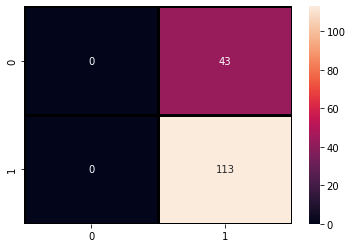

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred3),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,y_pred3))

# Conclusion :
Here we applied SVM to the data using SVM with Kernal rbf, Linear SVM, SVM with Kernel poly, SVM with Kernel sigmoid and obtained accuracies for each model.

* The accuracy of model for Kernal rbf : 72.43%
* The accuracy of model for Linear SVM : 98.71%
* The accuracy of model for Kernal Poly : 97.43%
* The accuracy of model for Kernal Sigmoid : 72.43%

Hence, we can say that Linear SVM have the best model accuracy with 98.71%